In [1]:
import pandas as pd
import pyranges as pr
import upsetplot
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

p = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

## reproducible seaborn example


0.12.2


Python ver: 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Seaborn version: 0.12.2
Matplotlib version: 3.5.3
Pandas version: 1.3.5


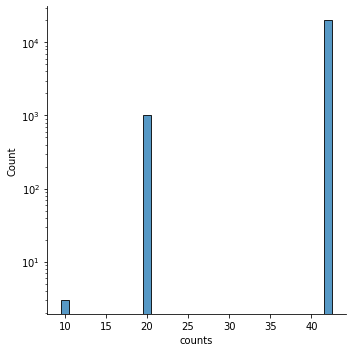

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import sys

print(f'Python ver: {sys.version}')
print(f'Seaborn version: {sns.__version__}')
print(f'Matplotlib version: {mpl.__version__}')
print(f'Pandas version: {pd.__version__}')
obs = [10 for i in range(3)]+\
      [20 for i in range(1000)]+\
      [42 for i in range(20000)]
df = pd.DataFrame(data=obs, columns=['counts'])
ax = sns.displot(df, x='counts', kind='hist',
             discrete=True,
             binwidth=1,
             log_scale=(False, True))
mpl.pyplot.savefig('temp.pdf')

## idk

In [2]:
h5 = '../cerberus_annot.h5'
filt_ab = '../cerberus_filtered_abundance.tsv'
feat = 'tss'
obs_source = 'lapa'
ref_sources = ['v40', 'v29']
support_sources = ['encode_cage',
                   'fantom_cage',
                   'encode_rampage']                   
support_label = 'CAGE, RAMPAGE'

In [3]:
ca = cerberus.read(h5)

## What is going on w/ single bp ends for tess? w/o lapa source?

['pas' 'pas,polya_atlas']
   Chromosome      Start        End Strand                Name  \
6        chr1  169817109  169817121      +   ENSG00000000460_7   
27       chr1   24434220   24434236      +  ENSG00000001461_13   
37       chr1   23069064   23069106      +  ENSG00000004487_10   
38       chr1   23070471   23070474      +  ENSG00000004487_11   
39       chr1   23071226   23071264      +  ENSG00000004487_12   

             source novelty          gene_id  tes  len  
6               pas   Novel  ENSG00000000460    7   12  
27              pas   Novel  ENSG00000001461   13   16  
37  pas,polya_atlas   Novel  ENSG00000004487   10   42  
38              pas   Novel  ENSG00000004487   11    3  
39  pas,polya_atlas   Novel  ENSG00000004487   12   38  
1


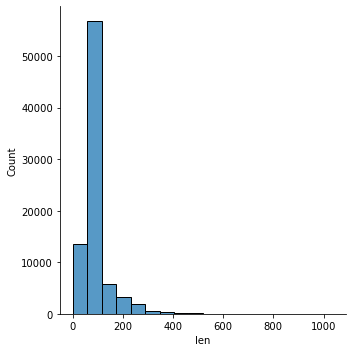

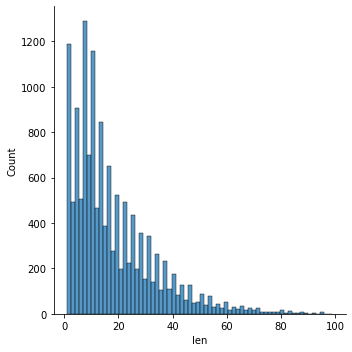

In [14]:
temp = ca.tes.copy(deep=True)
temp['len'] = temp.End-temp.Start
print(temp.loc[temp.len < 100].source.unique())
print(temp.loc[temp.len < 100].head())

temp2 = temp.loc[temp.source.str.contains('polya_atlas')]
sns.displot(temp2, kind='hist', x='len')
print(temp2.len.min())

temp2 = temp.loc[(temp.len < 100)&(temp.source.str.contains('polya_atlas'))]
sns.displot(temp2, kind='hist', x='len')



In [7]:
temp = ca.tes.loc[ca.tes.source.str.contains('pas')]
temp.head()

,Chromosome,Start,End,Strand,Name,source,novelty,gene_id,tes
2,chr1,169852986,169853135,+,ENSG00000000460_3,"v40,v29,lapa,gtex,pas,polya_atlas",Known,ENSG00000000460,3
6,chr1,169817109,169817121,+,ENSG00000000460_7,pas,Novel,ENSG00000000460,7
23,chr1,24472925,24473026,+,ENSG00000001461_1,"v40,v29,lapa,pas,polya_atlas",Known,ENSG00000001461,1
27,chr1,24434220,24434236,+,ENSG00000001461_13,pas,Novel,ENSG00000001461,13
29,chr1,24466259,24466428,+,ENSG00000001461_3,"v40,v29,lapa,gtex,pas,polya_atlas",Known,ENSG00000001461,3


In [5]:
df = pd.read_csv(filt_ab, sep='\t')
df['gid_stable'] = cerberus.get_stable_gid(df, 'annot_gene_id')
df['tes_id'] = df.gid_stable+'_'+df.annot_transcript_id.str.rsplit(',', n=1, expand=True)[1].str.rsplit(']', expand=True)[0]

In [6]:
df.loc[df.tes_id =='ENSG00000143013_7']
# original tid = ENST00000370544.9#4

,gene_ID,transcript_ID,annot_gene_id,annot_transcript_id,annot_gene_name,annot_transcript_name,n_exons,length,gene_novelty,transcript_novelty,...,heart_right_ventricle_3_1,right_cardiac_atrium_1_1,ovary_3_1,huvec_1_2,right_cardiac_atrium_4_1,wtc11_1_2,kidney_1_1,heart_left_ventricle_2_1,gid_stable,tes_id
10006,2161,"8004,8004",ENSG00000143013.12,"ENSG00000143013[1,1,7]",LMO4,"LMO4[1,1,7]",5.0,5405.0,Known,Known,...,0,0,0,0,0,0,0,0,ENSG00000143013,ENSG00000143013_7


In [7]:
ca.tes.loc[ca.tes.Name=='ENSG00000143013_7']

,Chromosome,Start,End,Strand,Name,source,novelty,gene_id,tes
3626,chr1,87345490,87345491,+,ENSG00000143013_7,"pas,polya_atlas",Novel,ENSG00000143013,7


In [8]:
ca.t_map.loc[ca.t_map.original_transcript_id=='ENST00000370544.9#4']

,original_transcript_id,ic,ic_id,tss_id,tss,tes_id,tes,gene_id,gene_name,original_transcript_name,transcript_triplet,transcript_id,transcript_name,tss_first_sd_issue,tes_last_sa_issue,source
9827,ENST00000370544.9#4,1,ENSG00000143013_1,ENSG00000143013_1,1,ENSG00000143013_7,7,ENSG00000143013,LMO4,LMO4-202,"[1,1,7]","ENSG00000143013[1,1,7]","LMO4[1,1,7]",False,False,lapa


In [9]:
ca.t_map.loc[ca.t_map.original_transcript_id=='ENST00000370544.9#4']

,original_transcript_id,ic,ic_id,tss_id,tss,tes_id,tes,gene_id,gene_name,original_transcript_name,transcript_triplet,transcript_id,transcript_name,tss_first_sd_issue,tes_last_sa_issue,source
9827,ENST00000370544.9#4,1,ENSG00000143013_1,ENSG00000143013_1,1,ENSG00000143013_7,7,ENSG00000143013,LMO4,LMO4-202,"[1,1,7]","ENSG00000143013[1,1,7]","LMO4[1,1,7]",False,False,lapa


In [10]:
print(87328881-50)
print(87328881+50)

87328831
87328931


In [11]:
ca.tes_map.loc[(ca.tes_map.source=='lapa')&(ca.tes_map.Chromosome=='chr1')&\
               (ca.tes_map.Start>87345488-51)].sort_values(by='Start', ascending=True).head()

,Chromosome,Start,End,Strand,source,Name
16947,chr1,87347052,87347153,+,lapa,ENSG00000143013_5
14700,chr1,87348864,87348973,+,lapa,ENSG00000143013_1
62599,chr1,87805235,87805336,-,lapa,ENSG00000279778_1
62600,chr1,87899858,87899959,-,lapa,ENSG00000237505_11
14701,chr1,88520119,88520220,+,lapa,ENSG00000274321_1


In [12]:
ca.tes_map.loc[(ca.tes_map.Start>87345422-100)].sort_values(by='Start', ascending=True).head()

,Chromosome,Start,End,Strand,source,Name
14699,chr1,87345332,87345602,+,lapa,ENSG00000143013_2
83922,chr1,87345340,87345384,-,polya_atlas,NaN
9483,chr1,87345357,87345458,+,v29,ENSG00000143013_2
1988,chr1,87345357,87345458,+,v40,ENSG00000143013_2
19941,chr1,87345380,87345422,+,pas,ENSG00000143013_2


In [13]:
df.loc[df.tes_id=='ENSG00000198034_6']
#riginal_transcript_name "RPS4X-201 -- from cerberus gtf
# ENST00000316084.9#2 original transcript id

,gene_ID,transcript_ID,annot_gene_id,annot_transcript_id,annot_gene_name,annot_transcript_name,n_exons,length,gene_novelty,transcript_novelty,...,heart_right_ventricle_3_1,right_cardiac_atrium_1_1,ovary_3_1,huvec_1_2,right_cardiac_atrium_4_1,wtc11_1_2,kidney_1_1,heart_left_ventricle_2_1,gid_stable,tes_id
230137,56816,202345,ENSG00000198034.10,"ENSG00000198034[1,1,6]",RPS4X,"RPS4X[1,1,6]",7.0,1526.0,Known,Known,...,426,407,3045,4509,744,897,1008,1598,ENSG00000198034,ENSG00000198034_6
230139,56816,519714,ENSG00000198034.10,"ENSG00000198034[1,10,6]",RPS4X,"RPS4X[1,10,6]",7.0,1478.0,Known,NNC,...,0,0,9,7,1,0,1,3,ENSG00000198034,ENSG00000198034_6
230141,56816,520117,ENSG00000198034.10,"ENSG00000198034[1,11,6]",RPS4X,"RPS4X[1,11,6]",5.0,2294.0,Known,NIC,...,0,0,0,0,0,0,0,1,ENSG00000198034,ENSG00000198034_6
230144,56816,520175,ENSG00000198034.10,"ENSG00000198034[1,12,6]",RPS4X,"RPS4X[1,12,6]",6.0,1883.0,Known,NIC,...,1,0,0,5,0,0,1,7,ENSG00000198034,ENSG00000198034_6
230146,56816,521754,ENSG00000198034.10,"ENSG00000198034[1,13,6]",RPS4X,"RPS4X[1,13,6]",7.0,797.0,Known,NNC,...,1,0,0,3,1,0,0,0,ENSG00000198034,ENSG00000198034_6
230147,56816,521166,ENSG00000198034.10,"ENSG00000198034[1,14,6]",RPS4X,"RPS4X[1,14,6]",6.0,1262.0,Known,ISM_rescue,...,0,0,0,1,0,0,0,0,ENSG00000198034,ENSG00000198034_6
230150,56816,520016,ENSG00000198034.10,"ENSG00000198034[1,16,6]",RPS4X,"RPS4X[1,16,6]",7.0,1266.0,Known,NIC,...,0,0,0,2,1,0,0,1,ENSG00000198034,ENSG00000198034_6
230152,56816,521672,ENSG00000198034.10,"ENSG00000198034[1,17,6]",RPS4X,"RPS4X[1,17,6]",7.0,827.0,Known,NNC,...,0,0,0,1,3,1,1,1,ENSG00000198034,ENSG00000198034_6
230154,56816,520575,ENSG00000198034.10,"ENSG00000198034[1,18,6]",RPS4X,"RPS4X[1,18,6]",7.0,799.0,Known,NNC,...,1,0,3,1,0,0,0,2,ENSG00000198034,ENSG00000198034_6
230155,56816,202346,ENSG00000198034.10,"ENSG00000198034[1,4,6]",RPS4X,"RPS4X[1,4,6]",5.0,1820.0,Known,Known,...,0,0,0,0,1,0,0,0,ENSG00000198034,ENSG00000198034_6


In [14]:
ca.tes.loc[ca.tes.Name=='ENSG00000198034_6']

,Chromosome,Start,End,Strand,Name,source,novelty,gene_id,tes
229205,chrX,72272582,72272612,-,ENSG00000198034_6,"pas,polya_atlas",Novel,ENSG00000198034,6


In [15]:
ca.t_map.loc[ca.t_map.original_transcript_id=='ENST00000316084.9#2']

,original_transcript_id,ic,ic_id,tss_id,tss,tes_id,tes,gene_id,gene_name,original_transcript_name,transcript_triplet,transcript_id,transcript_name,tss_first_sd_issue,tes_last_sa_issue,source
319481,ENST00000316084.9#2,1,ENSG00000198034_1,ENSG00000198034_1,1,ENSG00000198034_6,6,ENSG00000198034,RPS4X,RPS4X-201,"[1,1,6]","ENSG00000198034[1,1,6]","RPS4X[1,1,6]",False,False,lapa


In [16]:
ca.tes_map.loc[(ca.tes_map.source=='lapa')&(ca.tes_map.Chromosome=='chrX')&\
               (ca.tes_map.Start>72272604-51)].head()

,Chromosome,Start,End,Strand,source,Name
1035935,chrX,72660668,72660769,+,lapa,ENSG00000225858_1
1035936,chrX,72779046,72779147,+,lapa,ENSG00000269911_1
1035937,chrX,72848422,72848523,+,lapa,ENSG00000184911_4
1035938,chrX,72848747,72848852,+,lapa,ENSG00000184911_1
1035939,chrX,73005662,73005763,+,lapa,ENSG00000184388_2
